In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
dbtest = pd.read_csv('test.csv')
dbtrain = pd.read_csv('train.csv')

In [23]:
dbtrain

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [4]:
dbtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [5]:
# 최종 학력과 income

<Figure size 2000x2000 with 0 Axes>

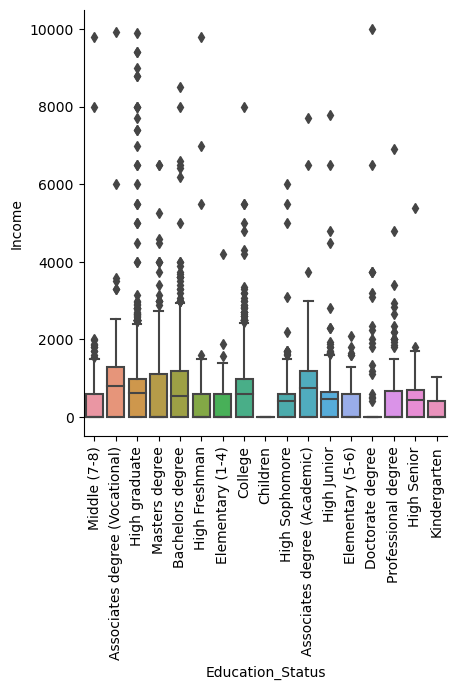

In [6]:
plt.figure(figsize=(20, 20))
catplot = sns.catplot(x='Education_Status', y='Income', data=dbtrain, kind='box', dodge=True)
catplot.set_xticklabels(rotation=90)

plt.show()

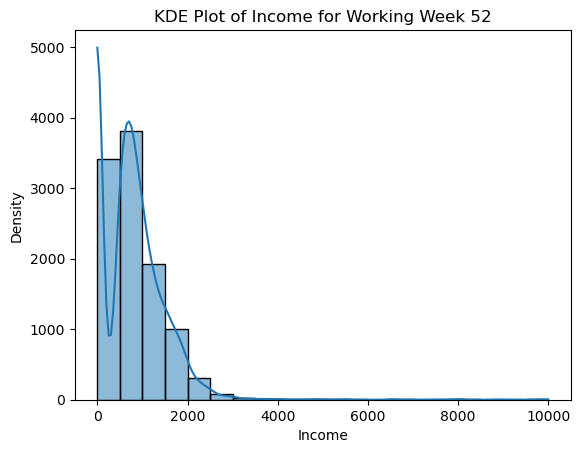

In [7]:
filtered_income = dbtrain[dbtrain['Working_Week (Yearly)'] == 52]['Income']

sns.histplot(filtered_income, bins=20, kde=True)

plt.title('KDE Plot of Income for Working Week 52')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

<Figure size 800x600 with 0 Axes>

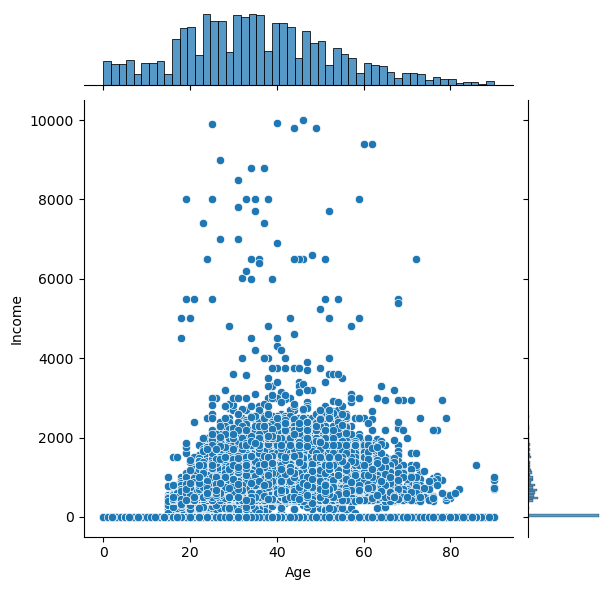

In [8]:
# age와 income 간의 상관관계 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 조인트 플롯 그리기
sns.jointplot(x='Age', y='Income', data=dbtrain, kind='scatter')

# 그래프 출력
plt.show()

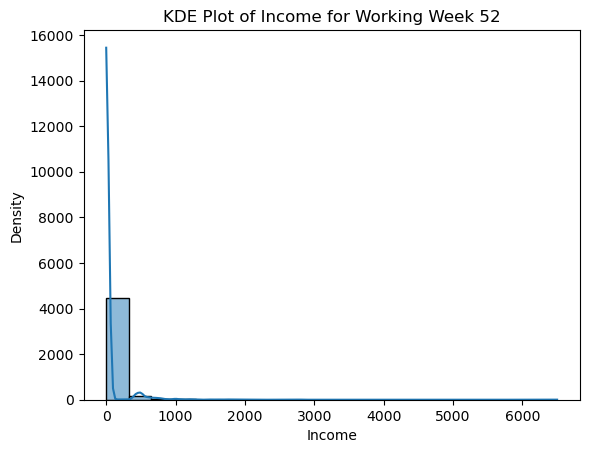

In [9]:
filtered_income = dbtrain[dbtrain['Working_Week (Yearly)'] == 0]['Income']

sns.histplot(filtered_income, bins=20, kde=True)

plt.title('KDE Plot of Income for Working Week 52')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

In [10]:
not_work_yes_income = dbtrain[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] != 0)].loc[:, ['Employment_Status', 'Industry_Status', 'Occupation_Status', 'Income', 'Working_Week (Yearly)']]
not_work_yes_income

,Employment_Status,Industry_Status,Occupation_Status,Income,Working_Week (Yearly)
169,Full-Time,Retail,Sales,600,0
212,Full-Time,Personal Services (except Private Household),Services,425,0
242,Children or Armed Forces,Manufacturing (Durable),Transportation,1735,0
335,Children or Armed Forces,Retail,Handlers/Cleaners,400,0
362,Choice Part-Time,Manufacturing (Non-durable),Handlers/Cleaners,708,0
...,...,...,...,...,...
19522,Children or Armed Forces,Business & Repair,Admin Support (include Clerical),675,0
19586,Children or Armed Forces,Manufacturing (Durable),Craft & Repair,500,0
19656,Children or Armed Forces,Communications,Sales,650,0
19750,Children or Armed Forces,Private Household Services,Private Household Services,450,0


In [11]:
dbtrain.loc[:, ['Industry_Status', 'Occupation_Status']]

,Industry_Status,Occupation_Status
0,Social Services,Services
1,Entertainment,Services
2,Manufacturing (Non-durable),Admin Support (include Clerical)
3,Retail,Technicians & Support
4,Retail,Sales
...,...,...
19995,Manufacturing (Durable),Handlers/Cleaners
19996,Education,Admin Support (include Clerical)
19997,Transportation,Technicians & Support
19998,Not in universe or children,Unknown


In [12]:
not_in_univ_not_unknown = dbtrain[(dbtrain['Industry_Status'] == 'Not in universe or children') & (dbtrain['Occupation_Status'] != 'Unknown')]
not_in_univ_not_unknown

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


In [13]:
dbtrain[(dbtrain['Employment_Status'] == 'Children or Armed Forces') & (dbtrain['Occupation_Status'] == 'Unknown')]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,...,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0
16,TRAIN_00016,10,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
22,TRAIN_00022,31,F,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,Puerto Rican,...,Native (Born in Puerto Rico or US Outlying),Puerto-Rico,Puerto-Rico,Puerto-Rico,Nonfiler,0,0,0,Unknown,0
23,TRAIN_00023,76,M,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Foreign-born (Naturalized US Citizen),Germany,Germany,Germany,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,TRAIN_19961,12,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19968,TRAIN_19968,14,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
19982,TRAIN_19982,18,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Native,US,Mexico,US,Nonfiler,0,0,0,Unknown,0
19989,TRAIN_19989,14,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0


In [14]:
not_in_univ_not_work = dbtrain[(dbtrain['Industry_Status'] == 'Not in universe or children') & (dbtrain['Employment_Status'] != 'Not Working') & (dbtrain['Employment_Status'] != 'Children or Armed Forces')]
not_in_univ_not_work

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
1188,TRAIN_01188,17,F,High Junior,Seeking Part-Time,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
2473,TRAIN_02473,17,M,High Junior,Seeking Part-Time,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
3116,TRAIN_03116,16,M,High Freshman,Seeking Part-Time,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
8583,TRAIN_08583,17,F,High Sophomore,Seeking Part-Time,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
12777,TRAIN_12777,18,F,High Senior,Seeking Part-Time,8,Not in universe or children,Unknown,Black,All other,...,Native,US,Haiti,Haiti,Nonfiler,0,0,0,Under Median,0
17591,TRAIN_17591,15,M,Middle (7-8),Seeking Part-Time,0,Not in universe or children,Unknown,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
18267,TRAIN_18267,43,F,High Freshman,Seeking Full-Time,0,Not in universe or children,Unknown,White,Puerto Rican,...,Native (Born in Puerto Rico or US Outlying),Puerto-Rico,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
19591,TRAIN_19591,48,M,Associates degree (Vocational),Seeking Full-Time,12,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0


In [15]:
not_work_yes_inc = dbtrain[(dbtrain['Employment_Status'] == 'Not Working') & (dbtrain['Income'] == 0)]
not_work_yes_inc

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0
21,TRAIN_00021,16,F,High Freshman,Not Working,14,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
28,TRAIN_00028,63,M,Masters degree,Not Working,6,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0
35,TRAIN_00035,16,F,High Freshman,Not Working,0,Not in universe or children,Unknown,White,Puerto Rican,...,Native,US,Puerto-Rico,Puerto-Rico,Nonfiler,0,0,0,Under Median,0
56,TRAIN_00056,17,F,High Freshman,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19962,TRAIN_19962,62,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Married Filling Jointly one over 65 & one unde...,0,0,0,Unknown,0
19975,TRAIN_19975,18,M,High Sophomore,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19986,TRAIN_19986,31,M,Middle (7-8),Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0
19994,TRAIN_19994,17,F,High Sophomore,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0


In [17]:
dbtrain['Household_Status'].unique()

array(['Householder', 'Nonfamily householder',
       'Child 18+ never marr Not in a subfamily', 'Spouse of householder',
       'Other Relative 18+ ever married Responsible Person of subfamily',
       'Child <18 never marr not in subfamily',
       'Other Relative <18 never married child of subfamily Responsible Person',
       'Child 18+ ever married Responsible Person of subfamily',
       'Secondary individual',
       'Grandchild 18+ never marr not in subfamily',
       'Other Rel 18+ ever marr not in subfamily',
       'Responsible Person of unrelated subfamily',
       'Grandchild <18 never married child of subfamily Responsible Person',
       'Child 18+ ever marr Not in a subfamily',
       'Other Rel 18+ never marr not in subfamily',
       'Child 18+ never married Responsible Person of subfamily',
       'Other Rel <18 never marr not in subfamily',
       'Child under 18 of Responsible Person of unrelated subfamily',
       'Grandchild <18 never marr not in subfamily', 'In 

In [18]:
dbtrain['Birth_Country'].unique()

array(['US', 'Cuba', 'Portugal', 'Mexico', 'Puerto-Rico', 'Germany',
       'Japan', 'Columbia', 'Philippines', 'Unknown', 'Italy',
       'Trinadad&Tobago', 'South Korea', 'Iran', 'England', 'India',
       'Vietnam', 'France', 'Scotland', 'Ecuador', 'China',
       'Outlying-U S (Guam USVI etc)', 'Nicaragua', 'Peru', 'Canada',
       'Jamaica', 'Dominican-Republic', 'Poland', 'Hong Kong', 'Thailand',
       'Cambodia', 'Guatemala', 'Laos', 'Yugoslavia', 'Haiti', 'Ireland',
       'El-Salvador', 'Panama', 'Honduras', 'Greece', 'Hungary', 'Taiwan',
       'Holand-Netherlands'], dtype=object)

In [19]:
dbtrain['Tax_Status'].unique()

array(['Nonfiler', 'Single',
       'Married Filling Jointly both under 65 (MFJ)',
       'Head of Household (HOH)',
       'Married Filling Jointly one over 65 & one under 65 (MFJ)',
       'Married Filling Jointly both over 65 (MFJ)'], dtype=object)

In [44]:
# 대륙을 기준으로 나라들을 그룹화하는 함수 정의
def group_by_continent(country):
    if country in ['Cuba', 'Mexico', 'Puerto-Rico', 'Colombia', 'Trinadad&Tobago', 'Ecuador', 'Outlying-U S (Guam USVI etc)', 'Nicaragua', 'Peru',
                   'Jamaica', 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Panama', 'Honduras', 'Guatemala', 'Canada', 'Columbia']:
        return 'America'
    elif country in ['US']:
        return 'US'
    elif country in ['Japan', 'Philippines', 'South Korea', 'Iran', 'India', 'Vietnam', 'China', 'Hong Kong', 'Thailand', 'Cambodia', 'Laos', 'Taiwan']:
        return 'Asia'
    elif country in ['Portugal', 'Germany', 'Italy', 'England', 'France', 'Scotland', 'Ireland', 'Poland', 'Yugoslavia', 'Greece', 'Hungary', 'Holand-Netherlands']:
        return 'Europe'
    elif country in ['Unknown']:
        return 'Unknown'
    else:
        return 'Other'

# Birth_Country를 기준으로 대륙을 나타내는 새로운 컬럼 생성
dbtrain['Birth_Continent'] = dbtrain['Birth_Country'].apply(group_by_continent)

# 결과 확인
print(dbtrain['Birth_Continent'])

0        US
1        US
2        US
3        US
4        US
         ..
19995    US
19996    US
19997    US
19998    US
19999    US
Name: Birth_Continent, Length: 20000, dtype: object


In [45]:
dbtrain['Birth_Continent'].unique()

array(['US', 'America', 'Europe', 'Asia', 'Unknown'], dtype=object)

In [46]:
dbtrain['Birth_Continent'].value_counts()

US         17825
America     1163
Asia         367
Unknown      330
Europe       315
Name: Birth_Continent, dtype: int64

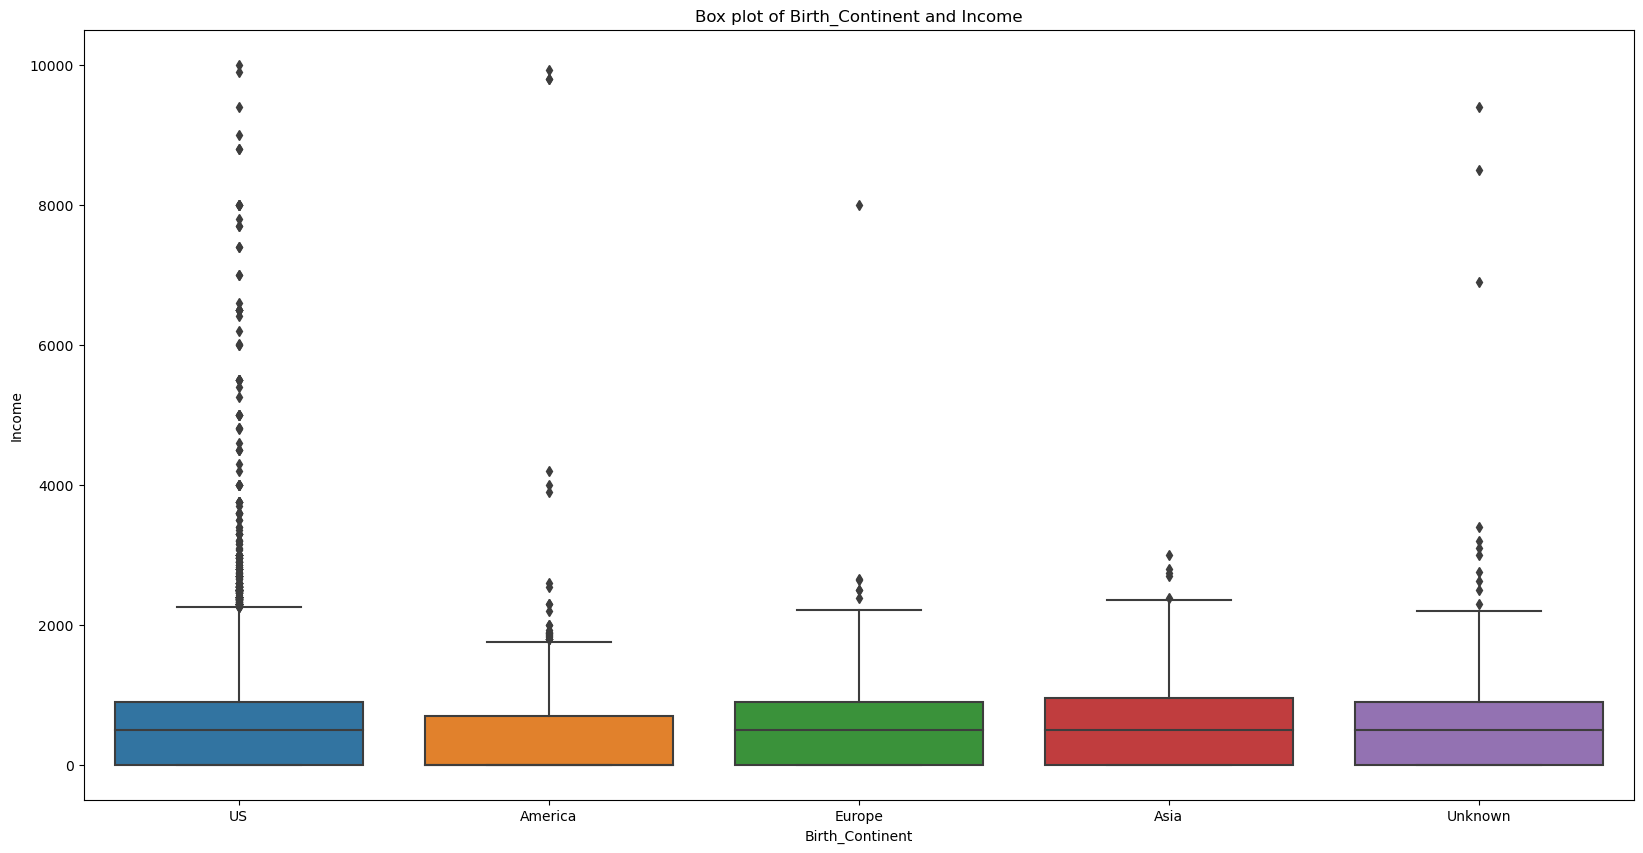

In [52]:
# Birth_Contient에 따른 수입의 박스플롯

plt.figure(figsize=(20, 10))
sns.boxplot(x='Birth_Continent', y='Income', data=dbtrain)

plt.title('Box plot of Birth_Continent and Income')
plt.xlabel('Birth_Continent')
plt.ylabel('Income')
plt.show()

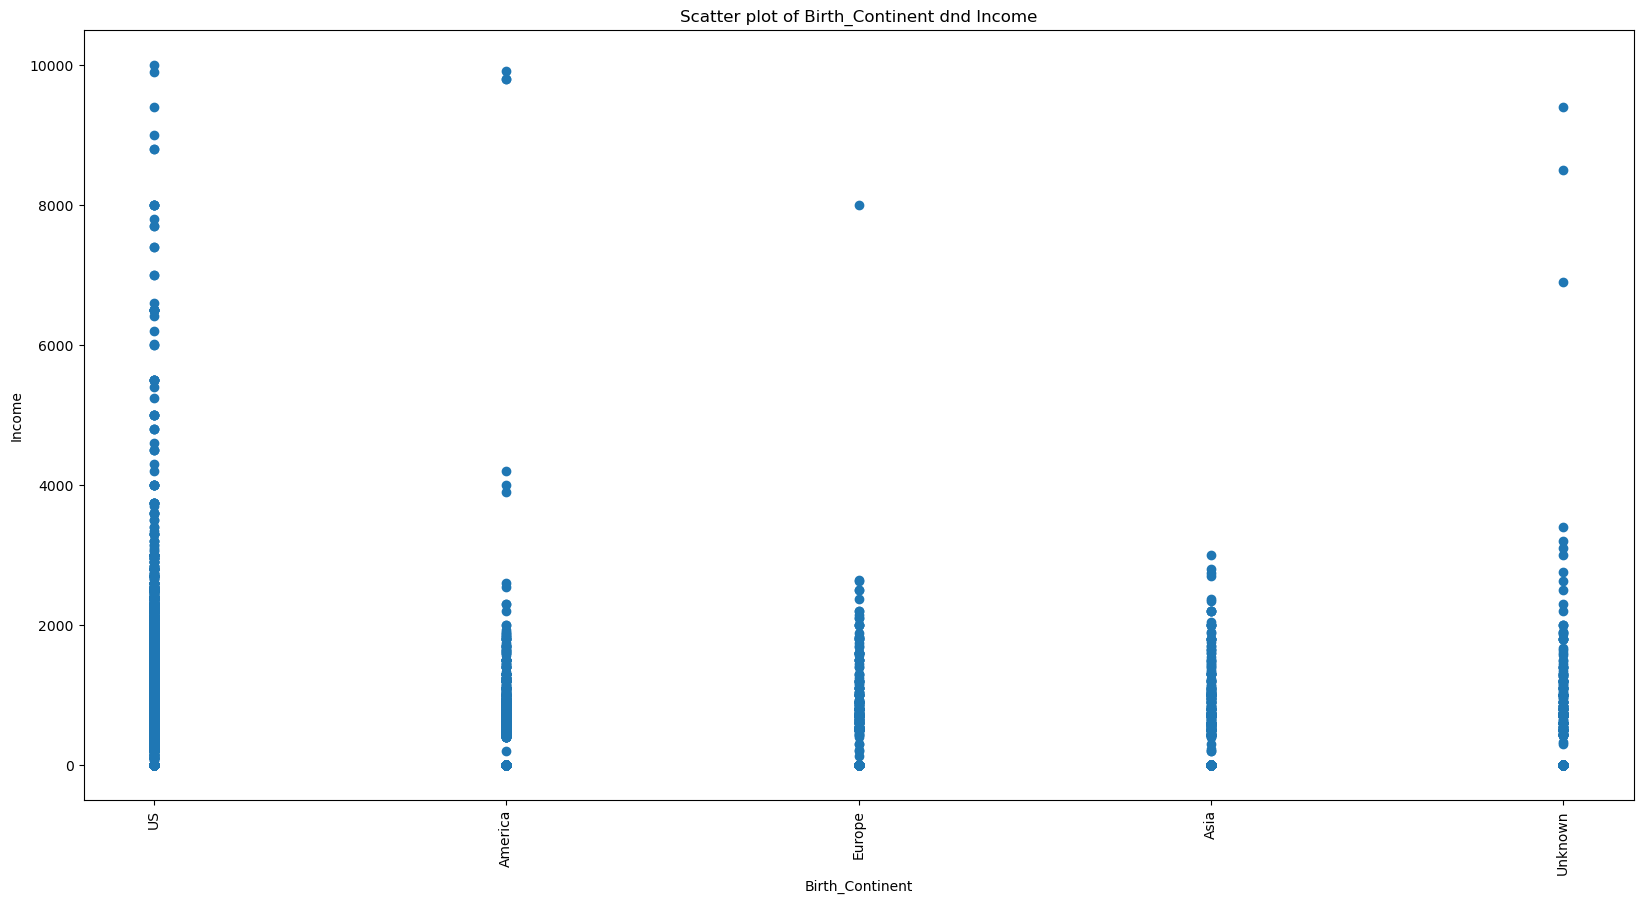

In [53]:
# Birth_Country에 따른 수입의 산점도

plt.figure(figsize=(20, 10))
plt.scatter(dbtrain['Birth_Continent'], dbtrain['Income'])

plt.title('Scatter plot of Birth_Continent dnd Income')
plt.xlabel('Birth_Continent')
plt.ylabel('Income')
plt.xticks(rotation=90)

plt.show()

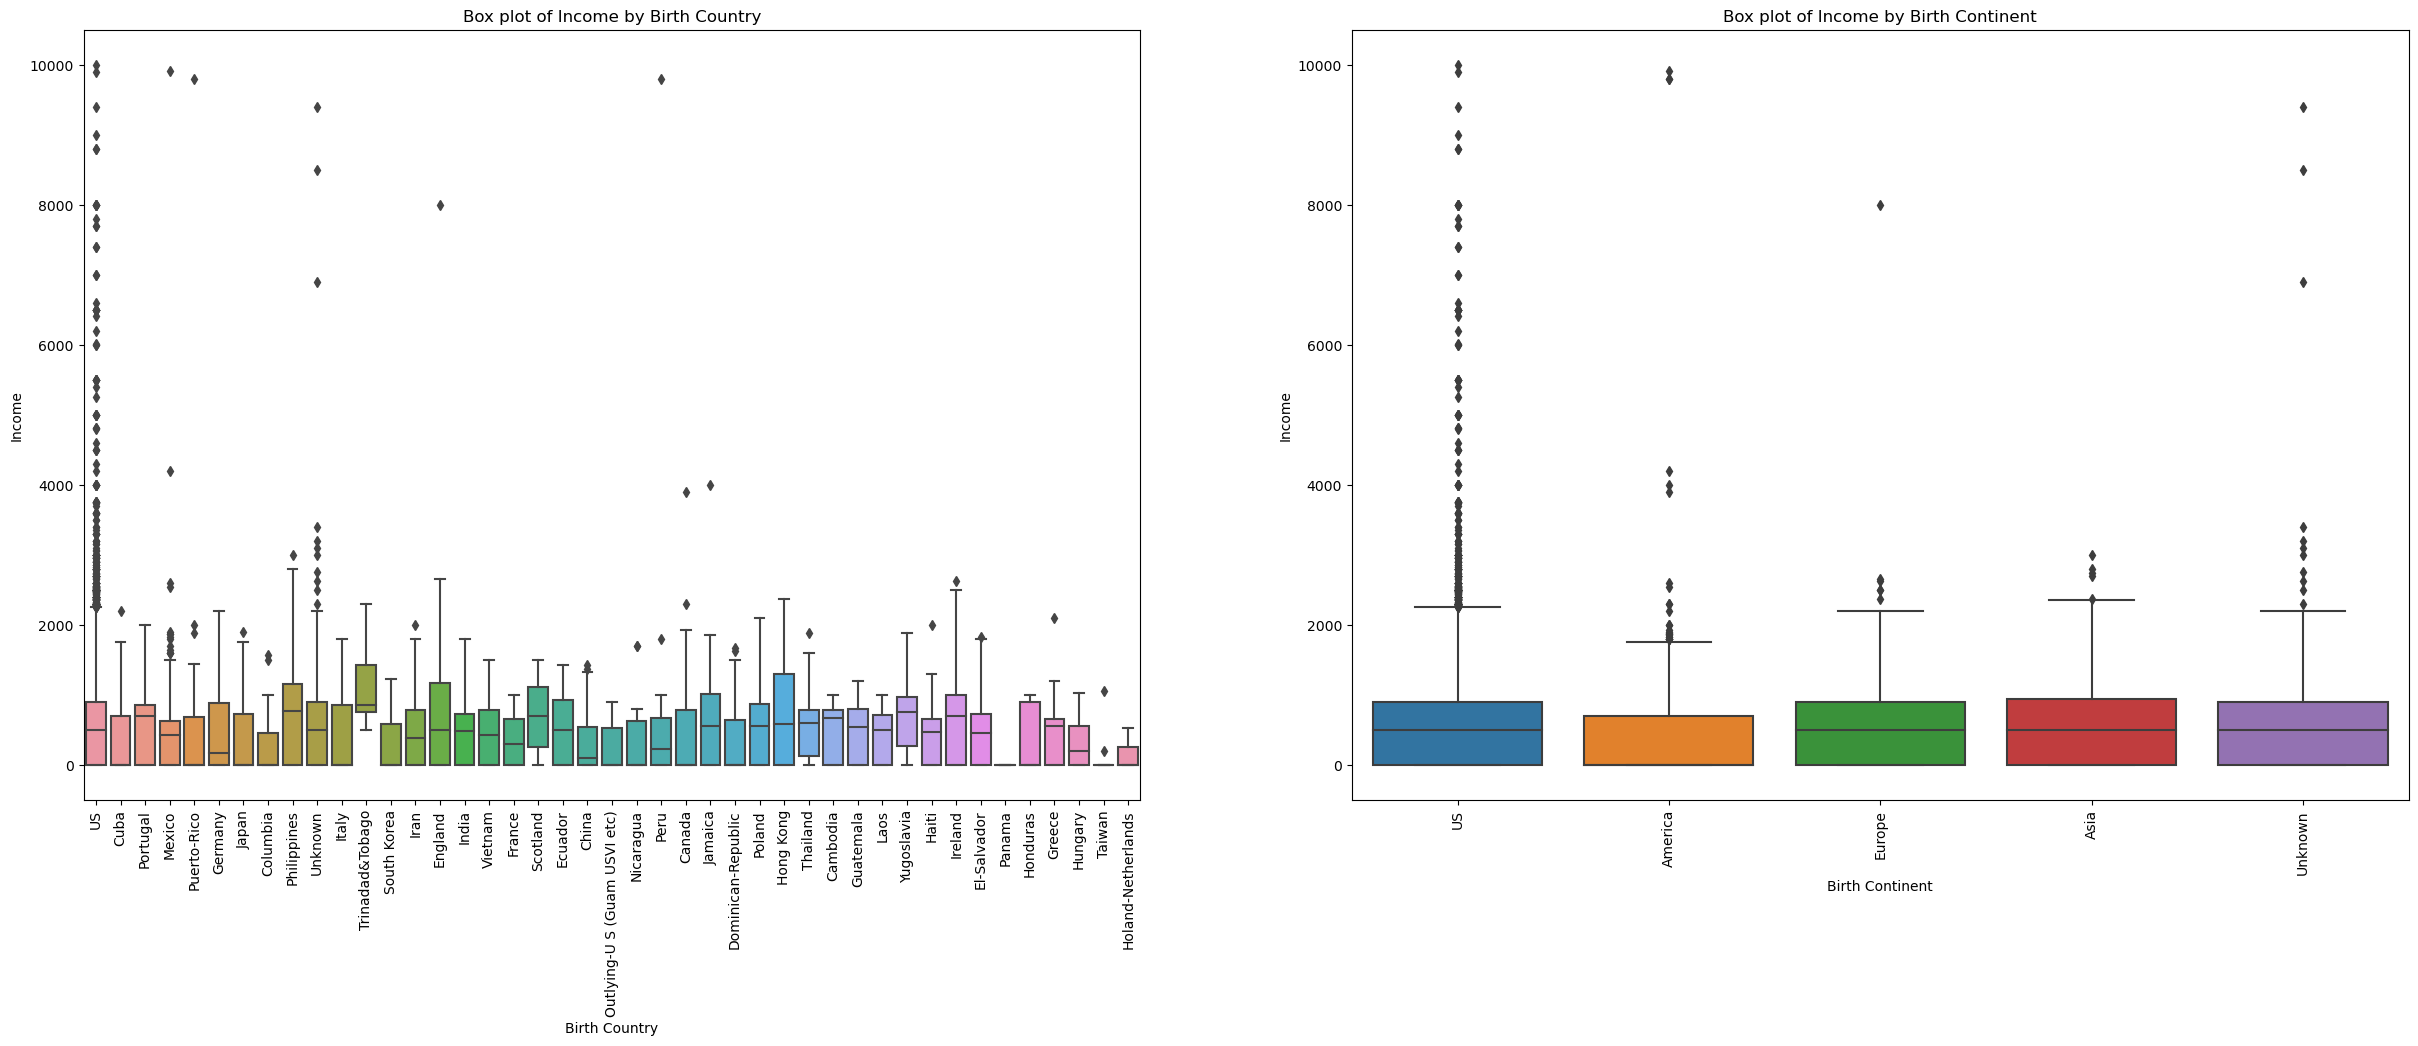

In [57]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Birth_Country', y='Income', data=dbtrain)
plt.title('Box plot of Income by Birth Country')
plt.xlabel('Birth Country')
plt.ylabel('Income')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(x='Birth_Continent', y='Income', data=dbtrain)
plt.title('Box plot of Income by Birth Continent')
plt.xlabel('Birth Continent')
plt.ylabel('Income')
plt.xticks(rotation=90)

plt.show()

In [58]:
dbtrain['Birth_Country'].value_counts()

US                              17825
Mexico                            540
Unknown                           330
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Columbia                           36
Italy                              35
South Korea                        31
Vietnam                            31
Ecuador                            31
Japan                              30
Portugal                           29
Nicaragua                          28
China                              28
Guatemala                          28
Haiti                              25
Iran                               24
Peru        

In [59]:
# 우리가 보기로 했던 애들
# Age, Gender, Education Status, Employment Status
# Working_Week (Yearly), Industry_Status, Occupation_Status, Race, Martial Status, Household Summary, Citizenship
# Birth Country, Gains

In [60]:
dbtrain['Dividends']

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Dividends, Length: 20000, dtype: int64

In [61]:
dbtrain['Dividends'].value_counts()

0       17928
100       134
1000       86
500        86
50         86
        ...  
392         1
528         1
107         1
59          1
456         1
Name: Dividends, Length: 420, dtype: int64

In [62]:
dbtrain[(dbtrain['Dividends'] != 0) & (dbtrain['Working_Week (Yearly)'] == 0)]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,Continent,Birth_Continent
114,TRAIN_00114,66,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Unknown,Unknown,Married Filling Jointly both over 65 (MFJ),0,0,4146,Under Median,0,US,US
212,TRAIN_00212,17,M,High Senior,Full-Time,0,Personal Services (except Private Household),Services,White,All other,...,US,US,Nonfiler,0,0,300,Under Median,425,US,US
290,TRAIN_00290,57,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,Mexican-American,...,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2000,Under Median,0,US,US
762,TRAIN_00762,29,F,Bachelors degree,Children or Armed Forces,0,Retail,Professional,White,All other,...,US,US,Married Filling Jointly both under 65 (MFJ),0,0,50,Under Median,2755,Unknown,Unknown
791,TRAIN_00791,76,M,Masters degree,Not Working,0,Not in universe or children,Unknown,White,All other,...,Unknown,US,Married Filling Jointly both over 65 (MFJ),0,0,5000,Under Median,0,US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,TRAIN_19684,70,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Italy,Italy,Married Filling Jointly both over 65 (MFJ),0,0,500,Under Median,0,US,US
19765,TRAIN_19765,16,M,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,US,US,Nonfiler,0,0,166,Unknown,0,US,US
19818,TRAIN_19818,73,F,High graduate,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,US,US,Single,0,0,125,Under Median,0,US,US
19943,TRAIN_19943,39,F,Bachelors degree,Children or Armed Forces,0,Hospitals,Professional,Asian/Pacific,All other,...,Philippines,Philippines,Married Filling Jointly both under 65 (MFJ),0,0,75,Unknown,2050,Asia,Asia


In [67]:
# 이 세가지가 아닌데 인컴이 0인 경우는 인컴이 결측치일까?

outlier_income = dbtrain[(dbtrain['Employment_Status'] != 'Not Working') & 
                         (dbtrain['Employment_Status'] != 'Children or Armed Forces') & 
                         (dbtrain['Working_Week (Yearly)'] != 0) & 
                         (dbtrain['Industry_Status'] != 'Not in universe or children') &
                         (dbtrain['Income'] == 0)]
outlier_income

# income 0이 결측치일 수 있다면, 인컴을 채워넣을 수도 있고, income이 결측치가 0이 아니라면, 제거할까..?

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,Continent,Birth_Continent
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,US,US,Single,0,0,0,Under Median,0,US,US
9,TRAIN_00009,53,M,High graduate,Seeking Full-Time,30,Construction,Machine Operators & Inspectors,White,All other,...,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0,US,US
37,TRAIN_00037,57,M,Bachelors degree,Full-Time,52,Public Administration,Management,White,All other,...,US,US,Single,0,0,0,Over Median,0,US,US
45,TRAIN_00045,41,M,College,Full-Time,52,Public Administration,Protective Services,White,Central or South American,...,Columbia,Columbia,Married Filling Jointly both under 65 (MFJ),99999,0,0,Over Median,0,America,America
64,TRAIN_00064,38,F,College,Full-Time,44,Manufacturing (Durable),Machine Operators & Inspectors,Black,All other,...,US,US,Head of Household (HOH),0,0,0,Under Median,0,US,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,TRAIN_19925,22,M,High Junior,Full-Time,52,Social Services,Services,Black,All other,...,US,US,Single,0,0,0,Under Median,0,US,US
19937,TRAIN_19937,20,M,High Sophomore,Full-Time,52,Manufacturing (Non-durable),Machine Operators & Inspectors,White,All other,...,US,US,Single,0,0,0,Under Median,0,US,US
19967,TRAIN_19967,51,F,Masters degree,Full-Time,36,Education,Professional,White,All other,...,US,US,Married Filling Jointly both under 65 (MFJ),0,0,12,Under Median,0,US,US
19977,TRAIN_19977,70,F,High graduate,Full-Time,52,Education,Admin Support (include Clerical),White,All other,...,US,US,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0,US,US


In [68]:
outlier_income['Working_Week (Yearly)'].value_counts()

52    1370
40      47
50      43
48      36
26      33
20      26
30      23
36      22
44      20
49      14
16      14
12      14
51      14
24      14
45      13
46      13
42      12
35      12
32      11
8       10
25      10
43       9
4        8
17       7
39       7
6        7
10       6
18       5
38       5
28       5
47       5
2        4
13       4
22       3
27       3
1        3
9        3
34       2
15       2
14       2
41       1
19       1
37       1
3        1
29       1
7        1
21       1
23       1
11       1
Name: Working_Week (Yearly), dtype: int64

In [69]:
outlier_income['Employment_Status'].value_counts()

Full-Time                        1556
Choice Part-Time                  133
Seeking Full-Time                  87
Part-Time (Usually Part-Time)      42
Seeking Part-Time                  30
Part-Time (Usually Full-Time)      22
Name: Employment_Status, dtype: int64

In [70]:
outlier_income['Income_Status'].value_counts()

# unknown은 제거할까?

Under Median    1136
Unknown          569
Over Median      165
Name: Income_Status, dtype: int64

In [72]:
outlier_income[outlier_income['Income_Status'] == 'Over Median']['Working_Week (Yearly)'].value_counts()

# over median인데 working week이 52시간인 애들은 결측치라고 판단하고 메꾸기
# 52시간인 애들 평균으로 메꾸기

52    150
50      4
40      2
48      2
30      1
49      1
42      1
26      1
36      1
44      1
46      1
Name: Working_Week (Yearly), dtype: int64

In [76]:
dbtrain.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Continent',
       'Birth_Continent'],
      dtype='object')

In [1]:
#피쳐엔지니어링

In [30]:
#80살 이상은 80으로 묶기로 결정
dbtrain.loc[dbtrain['Age'] >= 80, 'Age'] = 80
dbtest.loc[dbtest['Age'] >= 80, 'Age'] = 80

In [31]:
dbtrain.loc[(dbtrain['Employment_Status'] == 'Children or Armed Forces') & (dbtrain['Education_Status'] == 'Children'), 'Employment_Status'] = 'Children_EM'
dbtrain.loc[(dbtrain['Employment_Status'] == 'Children or Armed Forces') & (dbtrain['Education_Status'] != 'Children'), 'Employment_Status'] = 'Unknown'

dbtest.loc[(dbtest['Employment_Status'] == 'Children or Armed Forces') & (dbtest['Education_Status'] == 'Children'), 'Employment_Status'] = 'Children_EM'
dbtest.loc[(dbtest['Employment_Status'] == 'Children or Armed Forces') & (dbtest['Education_Status'] != 'Children'), 'Employment_Status'] = 'Unknown'

In [42]:
import pandas as pd

# 구간과 레이블 정의
bins = [-1, 0, 10, 20, 30, 40, 50, 60]  # 0을 포함하는 새로운 구간 추가
labels = ['0', '1~10', '11~20', '21~30', '31~40', '41~50', '51~60']

# cut 함수를 사용하여 구간에 따라 데이터를 분류하고, 새로운 열 'Working_Week_Range'를 생성합니다.
dbtrain['Working_Week_Range'] = pd.cut(dbtrain['Working_Week (Yearly)'], bins=bins, labels=labels)
dbtest['Working_Week_Range'] = pd.cut(dbtest['Working_Week (Yearly)'], bins=bins, labels=labels)


# 'Working_Week_Range'를 기준으로 그룹화하여 각 범주에 속하는 데이터의 수를 측정합니다.
grouped = dbtrain.groupby('Working_Week_Range').size()

# 결과 확인
print(grouped)

Working_Week_Range
0         4447
1~10       527
11~20      867
21~30      892
31~40     1094
41~50     1342
51~60    10831
dtype: int64


In [6]:
#income으로 Working_Week의 빈칸을 메꾼다 수입이 있는데 Working_Week이 0 인것은 결측치로 보기로 함
mean_income = dbtrain.groupby('Working_Week_Range')['Income'].mean()
print(mean_income)

Working_Week_Range
0         39.859534
1~10     399.084778
11~20    457.080910
21~30    537.874237
31~40    652.839702
41~50    675.589031
51~60    771.775100
Name: Income, dtype: float64


In [7]:
# 'Working_Week (Yearly)'를 기준으로 그룹화하여 각 그룹의 최빈값(mode)을 구합니다.
mode_working_week = dbtrain.groupby('Working_Week_Range')['Working_Week (Yearly)'].apply(lambda x: x.mode())

# 결과 확인
print(mode_working_week)

Working_Week_Range   
0                   0     0
1~10                0     8
11~20               0    20
21~30               0    26
31~40               0    40
41~50               0    50
51~60               0    52
Name: Working_Week (Yearly), dtype: int64


In [33]:
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 1) & (dbtrain['Income'] < 400), 'Working_Week (Yearly)'] = 8
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 400) & (dbtrain['Income'] < 500), 'Working_Week (Yearly)'] = 20
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 500) & (dbtrain['Income'] < 600), 'Working_Week (Yearly)'] = 26
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 600) & (dbtrain['Income'] < 650), 'Working_Week (Yearly)'] = 40
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 650) & (dbtrain['Income'] < 700), 'Working_Week (Yearly)'] = 50
dbtrain.loc[(dbtrain['Working_Week (Yearly)'] == 0) & (dbtrain['Income'] >= 700),'Working_Week (Yearly)'] = 52

In [34]:
# nonfiler, 적어도한명 65이상 묶어서 새로운 범주로 만든다 -> Tax_Status_New 라는 새로운 변수로 추가
dbtrain['Tax_Status_New'] = dbtrain['Tax_Status'].replace({
    'Nonfiler': 'Other',
    'Married Filling Jointly both over 65 (MFJ)': 'Other',
    'Married Filling Jointly one over 65 & one under 65': 'Other'
})

dbtest['Tax_Status_New'] = dbtest['Tax_Status'].replace({
    'Nonfiler': 'Other',
    'Married Filling Jointly both over 65 (MFJ)': 'Other',
    'Married Filling Jointly one over 65 & one under 65': 'Other'
})

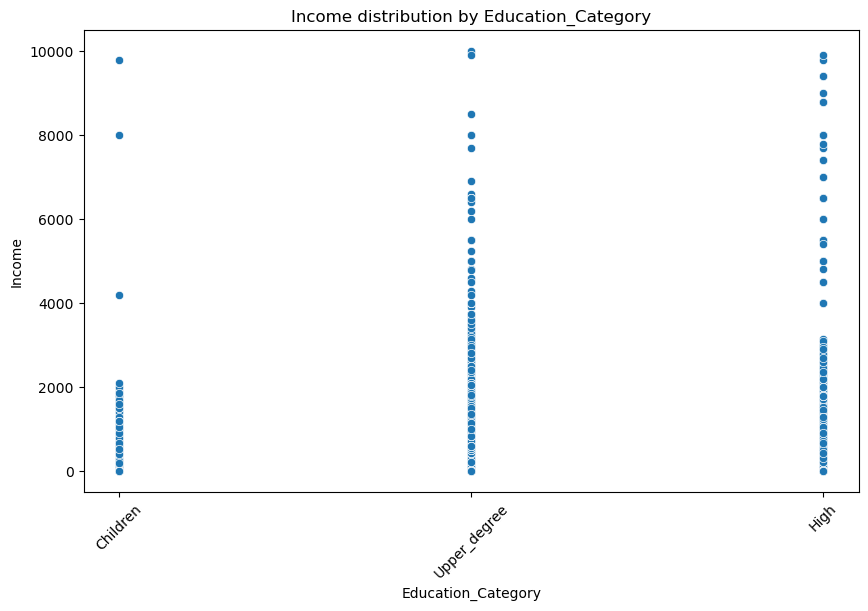

In [35]:
# 새로운 열 'Education_Category'를 생성하고 각 항목에 맞는 범주를 할당 1)대학 이상의 학위를 취득한 자를 Upper_Degree로 나눔
dbtrain.loc[dbtrain['Education_Status'].str.contains('College|Bachelors degree|Associates degree \(Vocational\)|Associates degree \(Academic\)|Masters degree|Doctorate degree|Professional degree'), 'Education_Category'] = 'Upper_degree'

# High graduate, High Junior, High Sophomore, High Freshman, High Senior을 High로 할당
dbtrain.loc[dbtrain['Education_Status'].str.contains('High graduate|High Junior|High Sophomore|High Freshman|High Senior'), 'Education_Category'] = 'High'

# Kindergarten, Elementary(5~6), Elementary(1~4), Middle(7~8)을 Upper_Children~Under High로 할당
dbtrain.loc[dbtrain['Education_Status'].str.contains('Kindergarten|Elementary \(1-4\)|Elementary \(5-6\)|Middle \(7-8\)'), 'Education_Category'] = 'Upper_Children~Under High'

#Children을 Children으로 그대로 할당
dbtrain.loc[dbtrain['Education_Status'].str.contains('Children'), 'Education_Category'] = 'Children'



# 새로운 열 'Education_Category'를 생성하고 각 항목에 맞는 범주를 할당
dbtest.loc[dbtest['Education_Status'].str.contains('College|Bachelors degree|Associates degree \(Vocational\)|Associates degree \(Academic\)|Masters degree|Doctorate degree|Professional degree'), 'Education_Category'] = 'Upper_degree'

# High graduate, High Junior, High Sophomore, High Freshman, High Senior을 High로 할당
dbtest.loc[dbtest['Education_Status'].str.contains('High graduate|High Junior|High Sophomore|High Freshman|High Senior'), 'Education_Category'] = 'High'

# Kindergarten, Elementary(5~6), Elementary(1~4), Middle(7~8)을 Upper_Children~Under High로 할당
dbtest.loc[dbtest['Education_Status'].str.contains('Kindergarten|Elementary \(1-4\)|Elementary \(5-6\)|Middle \(7-8\)'), 'Education_Category'] = 'Upper_Children~Under High'

# Children을 Children으로 그대로 할당
dbtest.loc[dbtest['Education_Status'].str.contains('Children'), 'Education_Category'] = 'Children'


#Education_Category과 Income 사이의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Education_Category', y='Income', data=dbtrain)
plt.title('Income distribution by Education_Category')
plt.xlabel('Education_Category')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

In [36]:
# 대륙을 기준으로 나라들을 그룹화하는 함수 정의
def group_by_continent(country):
    if country in ['Cuba', 'Mexico', 'Puerto-Rico', 'Colombia', 'Trinadad&Tobago', 'Ecuador', 'Outlying-U S (Guam USVI etc)', 'Nicaragua', 'Peru',
                   'Jamaica', 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Panama', 'Honduras', 'Guatemala', 'Canada', 'Columbia']:
        return 'America'
    elif country in ['US']:
        return 'US'
    elif country in ['Japan', 'Philippines', 'South Korea', 'Iran', 'India', 'Vietnam', 'China', 'Hong Kong', 'Thailand', 'Cambodia', 'Laos', 'Taiwan']:
        return 'Asia'
    elif country in ['Portugal', 'Germany', 'Italy', 'England', 'France', 'Scotland', 'Ireland', 'Poland', 'Yugoslavia', 'Greece', 'Hungary', 'Holand-Netherlands']:
        return 'Europe'
    elif country in ['Unknown']:
        return 'Unknown'
    else:
        return 'Other'

# Birth_Country를 기준으로 대륙을 나타내는 새로운 컬럼 생성
dbtrain['Birth_Continent'] = dbtrain['Birth_Country'].apply(group_by_continent)
dbtest['Birth_Continent'] = dbtest['Birth_Country'].apply(group_by_continent)

# 결과 확인
print(dbtrain['Birth_Continent'])

0        US
1        US
2        US
3        US
4        US
         ..
19995    US
19996    US
19997    US
19998    US
19999    US
Name: Birth_Continent, Length: 20000, dtype: object


In [37]:
dbtrain['Gains'] = dbtrain['Gains'].apply(lambda x: 0 if x == 0 else 1)
dbtest['Gains'] = dbtest['Gains'].apply(lambda x: 0 if x == 0 else 1)

In [38]:
#사용 안하는 열 제거하기

In [43]:
train_input = np.array(dbtrain.drop(['ID', 'Education_Status', 'Hispanic_Origin', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Birth_Country', 'Tax_Status', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Working_Week_Range'], axis=1))
train_target = np.array(dbtrain['Income'])

test_input = np.array(dbtest.drop(['ID', 'Education_Status', 'Hispanic_Origin', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Birth_Country', 'Tax_Status', 'Losses', 'Dividends', 'Income_Status', 'Working_Week_Range'], axis=1))

In [45]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [48]:
train_input0 = dbtrain.drop(['ID', 'Education_Status', 'Hispanic_Origin', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Birth_Country', 'Tax_Status', 'Losses', 'Dividends', 'Income_Status', 'Income', 'Working_Week_Range'], axis=1)
test_input0 = dbtest.drop(['ID', 'Education_Status', 'Hispanic_Origin', 'Household_Status', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Birth_Country', 'Tax_Status', 'Losses', 'Dividends', 'Income_Status', 'Working_Week_Range'], axis=1)
train_input0.columns

Index(['Age', 'Gender', 'Employment_Status', 'Working_Week (Yearly)',
       'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category',
       'Tax_Status_New', 'Birth_Continent'],
      dtype='object')

In [49]:
train_input00=train_input0.drop(['Age','Working_Week (Yearly)'], axis=1)
train_input01=train_input0.drop(['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent'], axis=1)


label_encoders = {}

# train_input1 데이터프레임 생성 (train_input의 복사본)
train_input1 = train_input00.copy()

# 각 열에 대해 레이블 인코딩 적용
for col in ['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent']:
    # 새로운 레이블 인코더 객체 생성
    label_encoder = LabelEncoder()
    # 해당 열에 대해 레이블 인코딩 적용 후 데이터프레임에 열 추가
    train_input1[col + '_encoded'] = label_encoder.fit_transform(train_input1[col])
    # 각 열의 레이블 인코더 객체를 저장
    label_encoders[col] = label_encoder

# 결과 확인
print(train_input1)

      Gender Employment_Status              Industry_Status  \
0          M         Full-Time              Social Services   
1          M         Full-Time                Entertainment   
2          F         Full-Time  Manufacturing (Non-durable)   
3          M         Full-Time                       Retail   
4          F         Full-Time                       Retail   
...      ...               ...                          ...   
19995      M           Unknown      Manufacturing (Durable)   
19996      F         Full-Time                    Education   
19997      M           Unknown               Transportation   
19998      F       Not Working  Not in universe or children   
19999      F           Unknown        Public Administration   

                      Occupation_Status   Race Martial_Status  \
0                              Services  White        Married   
1                              Services  White      Separated   
2      Admin Support (include Clerical)  Black  

In [50]:
test_input00=test_input0.drop(['Age','Working_Week (Yearly)'], axis=1)
test_input01=test_input0.drop(['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent'], axis=1)


label_encoders = {}

# train_input1 데이터프레임 생성 (train_input의 복사본)
test_input1 = test_input00.copy()

# 각 열에 대해 레이블 인코딩 적용
for col in ['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent']:
    # 새로운 레이블 인코더 객체 생성
    label_encoder = LabelEncoder()
    # 해당 열에 대해 레이블 인코딩 적용 후 데이터프레임에 열 추가
    test_input1[col + '_encoded'] = label_encoder.fit_transform(test_input1[col])
    # 각 열의 레이블 인코더 객체를 저장
    label_encoders[col] = label_encoder

# 결과 확인
print(test_input1)

     Gender Employment_Status              Industry_Status  \
0         M           Unknown  Not in universe or children   
1         M           Unknown  Not in universe or children   
2         F           Unknown                       Retail   
3         F         Full-Time   Medical (except Hospitals)   
4         M       Children_EM  Not in universe or children   
...     ...               ...                          ...   
9995      M           Unknown  Other professional services   
9996      M           Unknown                       Retail   
9997      M           Unknown                       Retail   
9998      M       Children_EM  Not in universe or children   
9999      M         Full-Time                       Retail   

          Occupation_Status   Race                Martial_Status  \
0                   Unknown  White                        Single   
1                   Unknown  White                        Single   
2                  Services  White                 

In [52]:
train_input2=train_input1.drop(['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent'], axis=1)

train_input2

,Gender_encoded,Employment_Status_encoded,Industry_Status_encoded,Occupation_Status_encoded,Race_encoded,Martial_Status_encoded,Household_Summary_encoded,Citizenship_encoded,Gains_encoded,Education_Category_encoded,Tax_Status_New_encoded,Birth_Continent_encoded
0,1,2,20,11,4,1,4,2,0,0,3,3
1,1,2,6,11,4,4,4,2,0,2,4,3
2,0,2,11,0,1,1,4,2,1,1,1,3
3,1,2,19,12,4,0,4,2,0,1,4,3
4,0,2,19,10,4,0,4,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,8,10,4,4,5,4,2,0,1,4,3
19996,0,2,5,0,4,5,0,2,0,2,3,3
19997,1,8,21,12,4,5,3,2,0,2,4,3
19998,0,3,14,14,4,6,4,2,0,1,4,3


In [53]:
test_input2=test_input1.drop(['Gender', 'Employment_Status', 'Industry_Status', 'Occupation_Status', 'Race', 'Martial_Status',
       'Household_Summary', 'Citizenship', 'Gains', 'Education_Category','Tax_Status_New', 'Birth_Continent'], axis=1)

test_input2

,Gender_encoded,Employment_Status_encoded,Industry_Status_encoded,Occupation_Status_encoded,Race_encoded,Martial_Status_encoded,Household_Summary_encoded,Citizenship_encoded,Gains_encoded,Education_Category_encoded,Tax_Status_New_encoded,Birth_Continent_encoded
0,1,8,14,14,4,5,4,2,0,1,4,3
1,1,8,14,14,4,5,0,2,0,2,3,3
2,0,8,19,11,4,5,0,2,0,1,4,3
3,0,2,12,11,4,1,7,2,0,3,1,3
4,1,0,14,14,4,5,2,2,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,8,15,12,4,5,4,2,0,3,4,3
9996,1,8,19,4,4,1,4,2,0,3,1,3
9997,1,8,19,11,1,5,0,2,0,1,3,3
9998,1,0,14,14,4,5,2,2,0,0,3,3


In [54]:
np.array(train_input01)
np.array(train_input2)

array([[ 1,  2, 20, ...,  0,  3,  3],
       [ 1,  2,  6, ...,  2,  4,  3],
       [ 0,  2, 11, ...,  1,  1,  3],
       ...,
       [ 1,  8, 21, ...,  2,  4,  3],
       [ 0,  3, 14, ...,  1,  4,  3],
       [ 0,  8, 18, ...,  1,  0,  3]], dtype=int64)

In [55]:
np.array(test_input01)
np.array(test_input2)

array([[ 1,  8, 14, ...,  1,  4,  3],
       [ 1,  8, 14, ...,  2,  3,  3],
       [ 0,  8, 19, ...,  1,  4,  3],
       ...,
       [ 1,  8, 19, ...,  1,  3,  3],
       [ 1,  0, 14, ...,  0,  3,  3],
       [ 1,  2, 19, ...,  1,  1,  3]], dtype=int64)

In [56]:
train_input11= np.column_stack((train_input01, train_input2))
train_input11

array([[63,  4,  1, ...,  0,  3,  3],
       [37, 52,  1, ...,  2,  4,  3],
       [58, 52,  0, ...,  1,  1,  3],
       ...,
       [22, 52,  1, ...,  2,  4,  3],
       [76,  0,  0, ...,  1,  4,  3],
       [41, 52,  0, ...,  1,  0,  3]], dtype=int64)

In [57]:
test_input11= np.column_stack((test_input01, test_input2))
test_input11

array([[79,  0,  1, ...,  1,  4,  3],
       [47,  0,  1, ...,  2,  3,  3],
       [18, 52,  0, ...,  1,  4,  3],
       ...,
       [18,  7,  1, ...,  1,  3,  3],
       [ 9,  0,  1, ...,  0,  3,  3],
       [34, 39,  1, ...,  1,  1,  3]], dtype=int64)

In [58]:
gb= GradientBoostingRegressor()
scores= cross_validate(gb, train_input11, train_target, return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score'])) 

0.30438910438650313 0.2802489805614788


In [59]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_input11, train_target, test_size=0.2)

gb.fit(X_train, y_train)

y_preds= gb.predict(X_test)

mse=mean_squared_error(y_test, y_preds)

rmse=np.sqrt(mse)

print(rmse)

557.2223534404961


In [60]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
scores= cross_validate(rf, train_input11, train_target, return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8662010674215335 0.18037038265166055


In [67]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 모델 초기화
mlp_regressor = MLPRegressor()
linear_regression = LinearRegression()
hist_gradient_boosting = HistGradientBoostingRegressor()

# 모델 앙상블
ensemble_model = VotingRegressor(estimators=[
    ('mlp', mlp_regressor),
    ('lr', linear_regression),
    ('hgb', hist_gradient_boosting)
])
# 교차 검증을 사용하여 앙상블 모델의 성능을 평가
scores = cross_validate(ensemble_model, train_input11, train_target, return_train_score=True, n_jobs=-1)

# 교차 검증 결과의 평균 출력
print("훈련 세트 평균 정확도:", np.mean(scores['train_score']))
print("테스트 세트 평균 정확도:", np.mean(scores['test_score']))

X_train, X_test, y_train, y_test = train_test_split(train_input11, train_target, test_size=0.2)
ensemble_model.fit(X_train, y_train)
y_preds= ensemble_model.predict(X_test)

mse=mean_squared_error(y_test, y_preds)  
rmse=np.sqrt(mse)

print(rmse) 

훈련 세트 평균 정확도: 0.28851515049616
테스트 세트 평균 정확도: 0.26065930299227225


C:\Users\82108\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


679.3114504387778


In [66]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import numpy as np

ensemble_model = VotingRegressor(estimators=[
    ('mlp', mlp_regressor),
    ('lr', linear_regression),
    ('hgb', hist_gradient_boosting)
])

# 교차 검증을 사용하여 앙상블 모델의 성능을 평가
scores = cross_validate(ensemble_model, train_input11, train_target, return_train_score=True, n_jobs=-1)

# 교차 검증 결과의 평균 출력
print("훈련 세트 평균 정확도:", np.mean(scores['train_score']))
print("테스트 세트 평균 정확도:", np.mean(scores['test_score']))

X_train, X_test, y_train, y_test = train_test_split(train_input11, train_target, test_size=0.2)
ensemble_model.fit(X_train, y_train)
y_preds= ensemble_model.predict(X_test)

mse=mean_squared_error(y_test, y_preds)  
rmse=np.sqrt(mse)

print(rmse) 

훈련 세트 평균 정확도: 0.2843089842480316
테스트 세트 평균 정확도: 0.25949127023887975


C:\Users\82108\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


569.5779570701113


In [62]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor()
scores= cross_validate(hgb, train_input11, train_target, return_train_score= True,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

C:\Users\82108\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.3639760507844719 0.28448153418813255


In [ ]:
#Prediction on Test set
#이제 모델이 학습하지 않았던 테스트 셋을 모델에 주어서, 소득을 예측해 보겠습니다.
#데이콘에서 준 파일인 sample_submission.csv파일을 읽어서 제출 준비를 합니다.

In [68]:
submission = pd.read_csv('sample_submission.csv')
submission

,ID,Income
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
9995,TEST_9995,0
9996,TEST_9996,0
9997,TEST_9997,0
9998,TEST_9998,0


In [69]:
prediction = gb.predict(test_input11)

# 두 번째 열에 예측 결과를 추가
submission['Income'] = prediction

# 수정된 submission을 CSV 파일로 저장
submission.to_csv('submission.csv', index=False)

In [70]:
submission

,ID,Income
0,TEST_0000,-2.309789
1,TEST_0001,37.601553
2,TEST_0002,401.980511
3,TEST_0003,692.810139
4,TEST_0004,12.182222
...,...,...
9995,TEST_9995,809.205054
9996,TEST_9996,768.034306
9997,TEST_9997,294.475235
9998,TEST_9998,12.182222
